In [2]:
import pandas as pd
import matplotlib.pyplot as plt



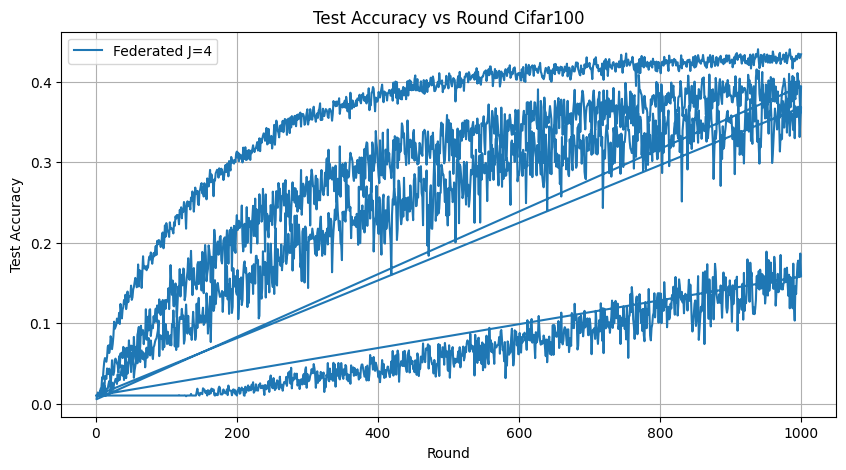

In [ ]:
csv_files = ["results_only_test_iid_J_16.csv", "results_only_test_iid_J_8.csv", "results_only_test_iid_J_4.csv", "results_only_cifar_more_step_scheduler_CosineAnnealingLR.csv"]  # replace with your file names
dfs = [pd.read_csv(f) for f in csv_files]

# Plot test accuracy
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):
    if 'J' in fname:
        name=f"Federated J={fname.split('J_')[1].split('.csv')[0]}"
    else:
        name='Baseline'
    plt.plot(df["round"], df["test_acc"], label=name)
plt.title("Test Accuracy vs Round Cifar100 iid")
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)

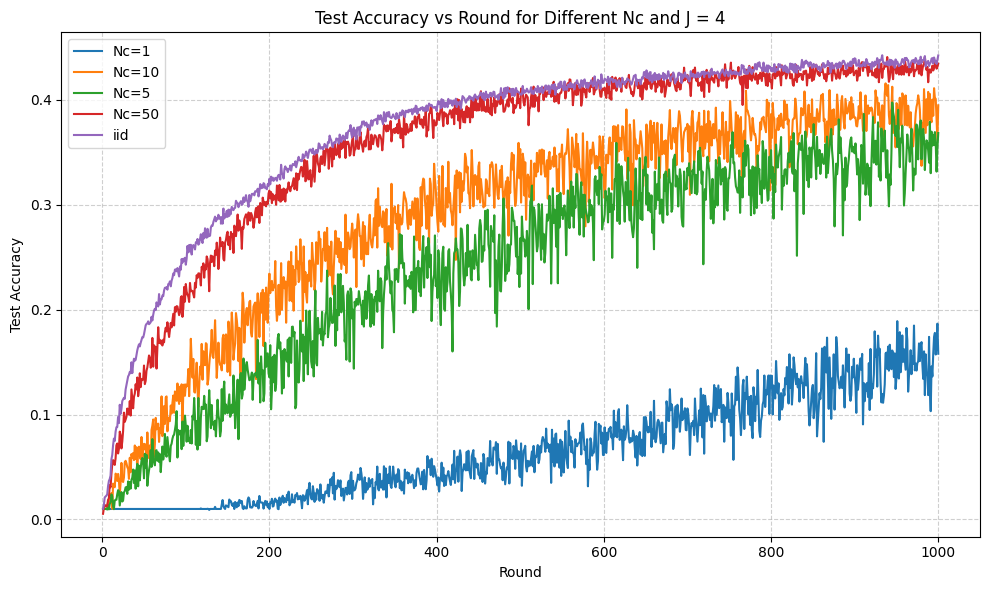

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re


# Load CSV file
df = pd.read_csv("cifar_heterogeneous_results_J_4.csv") # change filename if needed


# Extract Nc from the 'name' column


def extract_nc(name):
    match = re.search(r"uniform_(\d+)_", name)
    if match:
        return match.group(1) # numeric Nc as string
    elif "test_iid" in name:
        return "iid"
    return None


df["Nc"] = df["name"].apply(extract_nc)


# Plot test accuracy vs round for each Nc
plt.figure(figsize=(10, 6))
for nc, group in df.groupby("Nc"):
    label = "iid" if nc=="iid" else f"Nc={nc}"
    group_sorted = group.sort_values("round")
    plt.plot(group_sorted["round"], group_sorted["test_acc"], marker="", label=label)


plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Round for Different Nc and J = 4")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Colonne CSV: ['name', 'round', 'round_time', 'local_mean', 'local_std', 'val_loss', 'val_acc', 'test_loss', 'test_acc']
Metodi disponibili: ['alpha = 0.2' 'alpha = 0.5' 'iid' 'Nc = 1' 'Nc = 5' 'Nc = 10' 'Nc = 50']


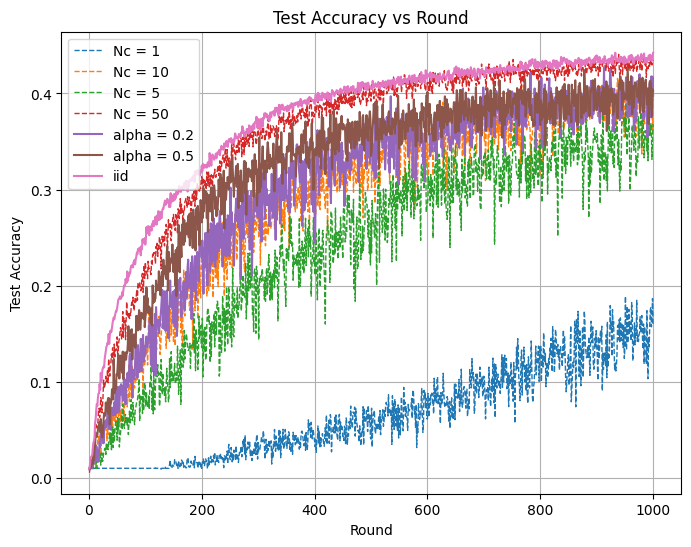

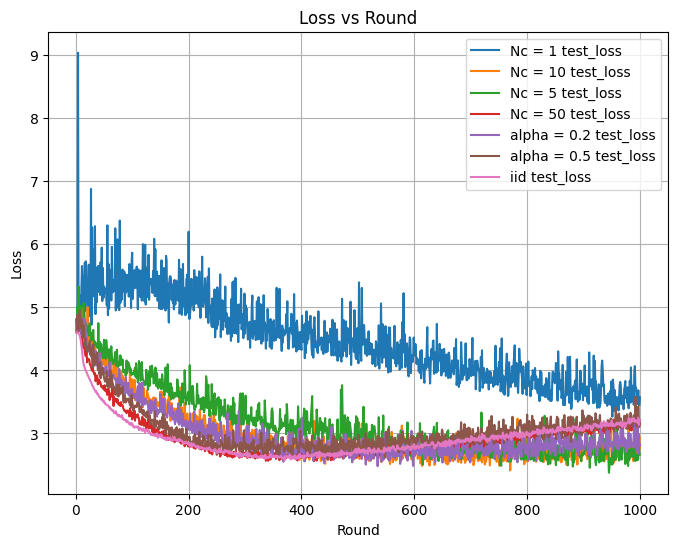

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#"Diversity_Score_results.csv"

df = pd.read_csv("diversity_score_vs_heterogeneous.csv")

# Controlliamo le colonne disponibili
print("Colonne CSV:", df.columns.tolist())
print("Metodi disponibili:", df["name"].unique())

# Organizziamo i risultati in un dizionario
results = {}
for name, group in df.groupby("name"):
    group_sorted = group.sort_values("round")
    results[name] = {
        "round": group_sorted["round"].tolist(),
        "val_acc": group_sorted["val_acc"].tolist(),
        "test_acc": group_sorted["test_acc"].tolist(),
        "val_loss": group_sorted["val_loss"].tolist(),
        "test_loss": group_sorted["test_loss"].tolist(),
    }

# --------- GRAFICI ---------

# 1. Test Accuracy vs Round
plt.figure(figsize=(8,6))
for method, metrics in results.items():
    linestyle = "--" if "Nc" in method else "-"
    linewidth = 1 if "Nc" in method else 1.5
    plt.plot(metrics["round"], metrics["test_acc"], linewidth=linewidth, linestyle=linestyle, label=method)
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Round")
plt.legend()
plt.grid(True)
plt.show()


# 3. Loss vs Round
plt.figure(figsize=(8,6))
for method, metrics in results.items():
    plt.plot(metrics["round"], metrics["test_loss"], label=f"{method} test_loss")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.title("Loss vs Round")
plt.legend()
plt.grid(True)
plt.show()


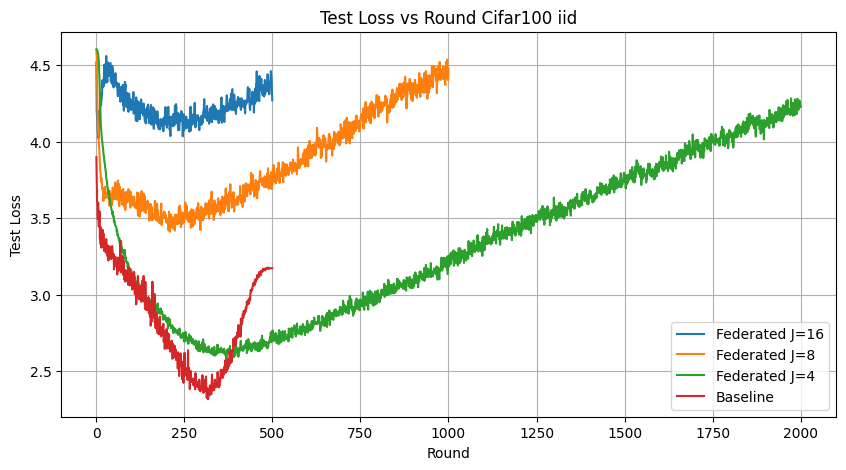

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    "results_only_test_iid_J_16.csv",
    "results_only_test_iid_J_8.csv",
    "results_only_test_iid_J_4.csv",
    "results_only_cifar_more_step_scheduler_CosineAnnealingLR.csv"
]
dfs = [pd.read_csv(f) for f in csv_files]

# Plot test loss
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):
    if 'J' in fname:
        name = f"Federated J={fname.split('J_')[1].split('.csv')[0]}"
    else:
        name = 'Baseline'
    plt.plot(df["round"], df["test_loss"], label=name)

plt.title("Test Loss vs Round Cifar100 iid")
plt.xlabel("Round")
plt.ylabel("Test Loss")
plt.legend()
plt.grid(True)
plt.show()


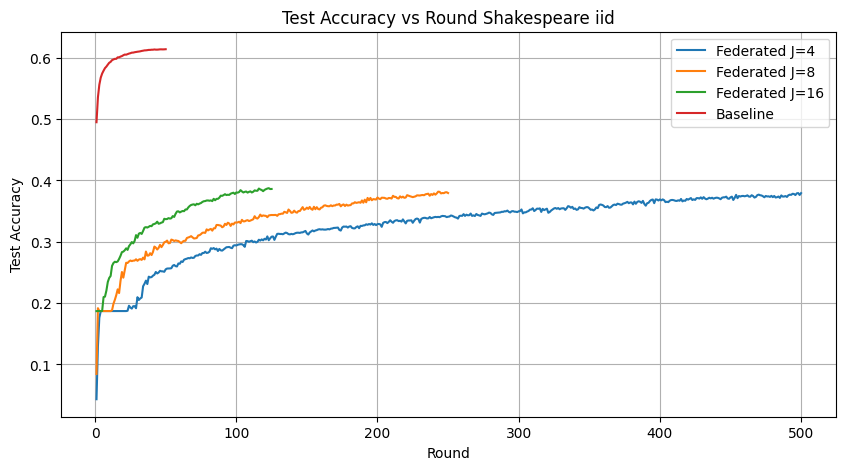

In [ ]:
csv_files = ["shakespeare_results_only_gamma_uniform_nc_iid_J_4.csv", "shakespeare_results_only_gamma_uniform_nc_iid_J_8.csv", "shakespeare_results_only_gamma_uniform_nc_iid_J_16.csv", "results_only_checkpointed_shakespeare_CosineAnnealingLR.csv"]  # replace with your file names
dfs = [pd.read_csv(f) for f in csv_files]

# Plot test accuracy
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):
    if 'J' in fname:
        name=f"Federated J={fname.split('J_')[1].split('.csv')[0]}"
    else:
        name='Baseline'
    plt.plot(df["round"], df["test_acc"], label=name)
plt.title("Test Accuracy vs Round Shakespeare iid")
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)

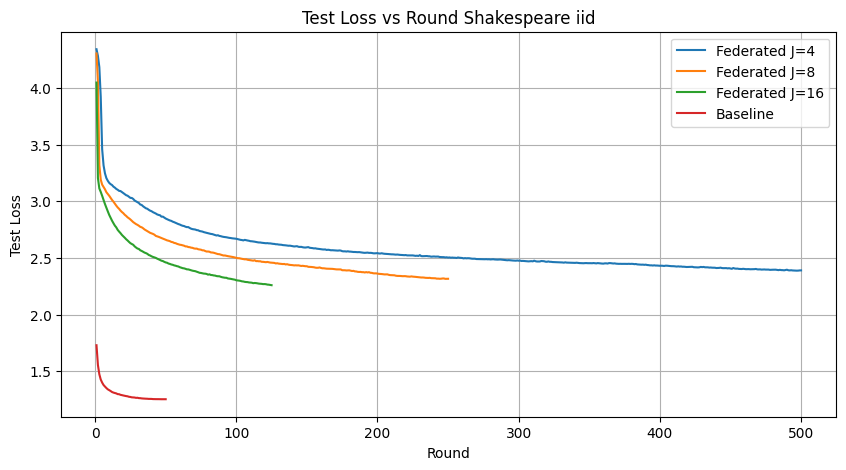

In [ ]:
csv_files = ["shakespeare_results_only_gamma_uniform_nc_iid_J_4.csv", "shakespeare_results_only_gamma_uniform_nc_iid_J_8.csv", "shakespeare_results_only_gamma_uniform_nc_iid_J_16.csv", "results_only_checkpointed_shakespeare_CosineAnnealingLR.csv"]  # replace with your file names

dfs = [pd.read_csv(f) for f in csv_files]

# Plot test loss
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):
    if 'J' in fname:
        name = f"Federated J={fname.split('J_')[1].split('.csv')[0]}"
    else:
        name = 'Baseline'
    plt.plot(df["round"], df["test_loss"], label=name)

plt.title("Test Loss vs Round Shakespeare iid")
plt.xlabel("Round")
plt.ylabel("Test Loss")
plt.legend()
plt.grid(True)
plt.show()


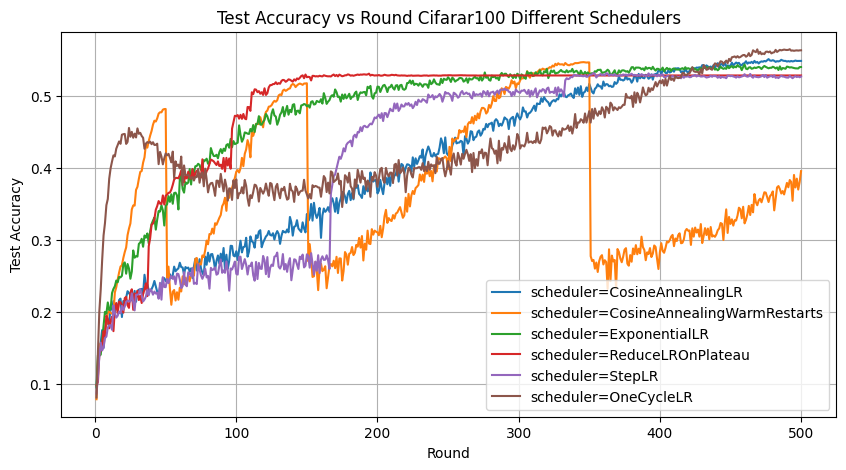

In [ ]:
####different schedulers
csv_files = ["results_only_cifar_more_step_scheduler_CosineAnnealingLR.csv", 
             "results_only_cifar_more_step_scheduler_CosineAnnealingWarmRestarts.csv", 

             "results_only_cifar_more_step_scheduler_ExponentialLR.csv",
                "results_only_cifar_more_step_scheduler_ReduceLROnPlateau.csv",
                "results_only_cifar_more_step_scheduler_StepLR.csv",
                "results_only_cifar_more_step_scheduler_OneCycleLR.csv"

             ] 
dfs = [pd.read_csv(f) for f in csv_files]

# Plot test accuracy
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):

    name=f"scheduler={fname.split('scheduler_')[1].split('.csv')[0]}"

    plt.plot(df["round"], df["test_acc"], label=name)
plt.title("Test Accuracy vs Round Cifar100 Different Schedulers")
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)


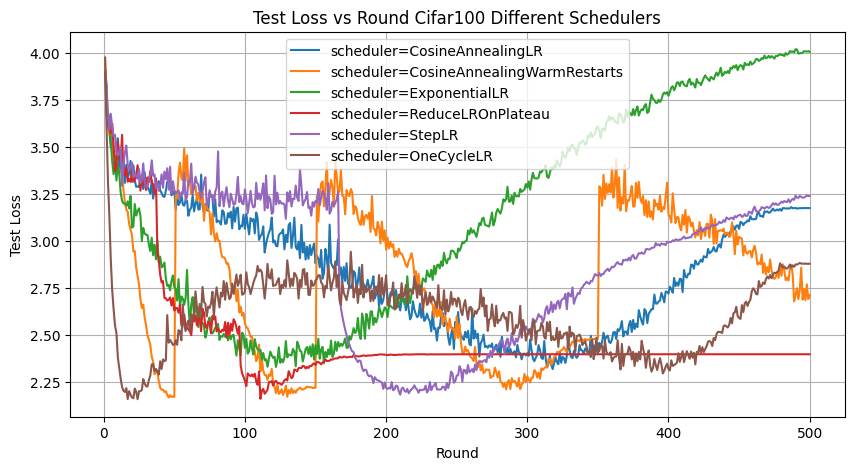

In [ ]:
csv_files = ["results_only_cifar_more_step_scheduler_CosineAnnealingLR.csv", 
             "results_only_cifar_more_step_scheduler_CosineAnnealingWarmRestarts.csv", 

             "results_only_cifar_more_step_scheduler_ExponentialLR.csv",
                "results_only_cifar_more_step_scheduler_ReduceLROnPlateau.csv",
                "results_only_cifar_more_step_scheduler_StepLR.csv",
                "results_only_cifar_more_step_scheduler_OneCycleLR.csv"

             ] 
dfs = [pd.read_csv(f) for f in csv_files]
# Plot test loss
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):
    name=f"scheduler={fname.split('scheduler_')[1].split('.csv')[0]}"

    plt.plot(df["round"], df["test_loss"], label=name)

plt.title("Test Loss vs Round Cifar100 Different Schedulers")
plt.xlabel("Round")
plt.ylabel("Test Loss")
plt.legend()
plt.grid(True)
plt.show()

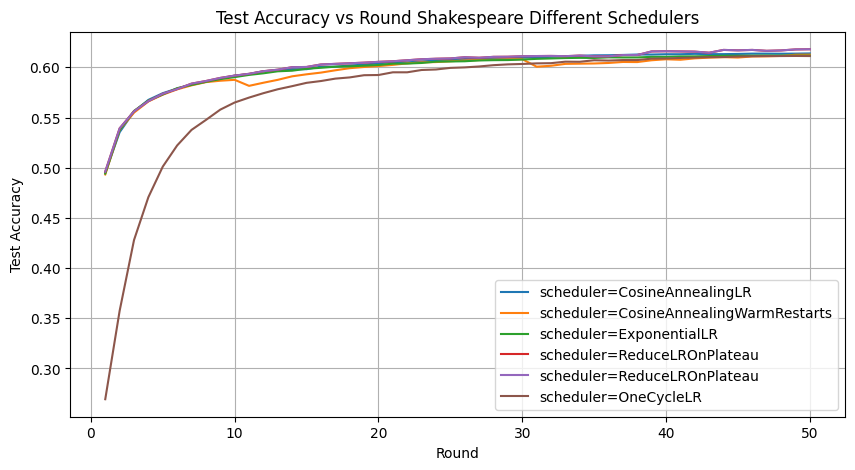

In [ ]:
csv_files = ["results_only_checkpointed_shakespeare_CosineAnnealingLR.csv", 
             "results_only_checkpointed_shakespeare_CosineAnnealingWarmRestarts.csv", 

             "results_only_checkpointed_shakespeare_ExponentialLR.csv",
                "results_only_checkpointed_shakespeare_ReduceLROnPlateau.csv",
                "results_only_checkpointed_shakespeare_ReduceLROnPlateau.csv",
                "results_only_checkpointed_shakespeare_OneCycleLR.csv"

             ] 
dfs = [pd.read_csv(f) for f in csv_files]

# Plot test accuracy
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):

    name=f"scheduler={fname.split('shakespeare_')[1].split('.csv')[0]}"

    plt.plot(df["round"], df["test_acc"], label=name)
plt.title("Test Accuracy vs Round Shakespeare Different Schedulers")
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)

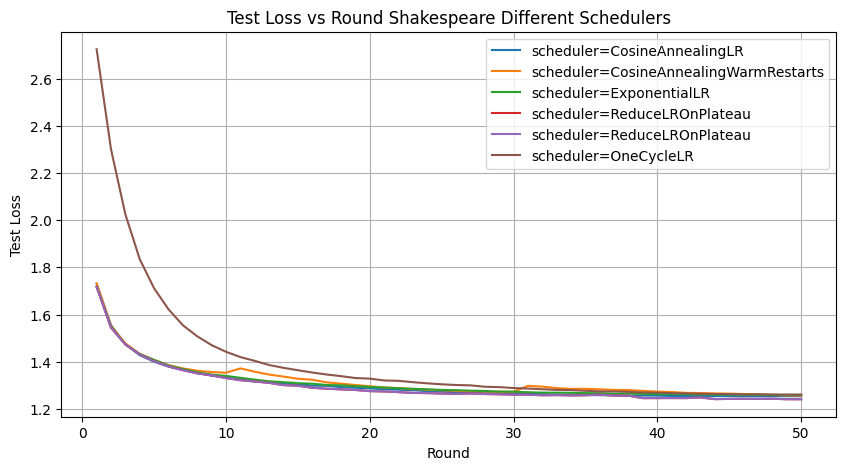

In [4]:
csv_files = ["results_only_checkpointed_shakespeare_CosineAnnealingLR.csv", 
             "results_only_checkpointed_shakespeare_CosineAnnealingWarmRestarts.csv", 

             "results_only_checkpointed_shakespeare_ExponentialLR.csv",
                "results_only_checkpointed_shakespeare_ReduceLROnPlateau.csv",
                "results_only_checkpointed_shakespeare_ReduceLROnPlateau.csv",
                "results_only_checkpointed_shakespeare_OneCycleLR.csv"

             ] 
dfs = [pd.read_csv(f) for f in csv_files]
# Plot test loss
plt.figure(figsize=(10, 5))
for df, fname in zip(dfs, csv_files):
    name=f"scheduler={fname.split('shakespeare_')[1].split('.csv')[0]}"

    plt.plot(df["round"], df["test_loss"], label=name)

plt.title("Test Loss vs Round Shakespeare Different Schedulers")
plt.xlabel("Round")
plt.ylabel("Test Loss")
plt.legend()
plt.grid(True)
plt.show()

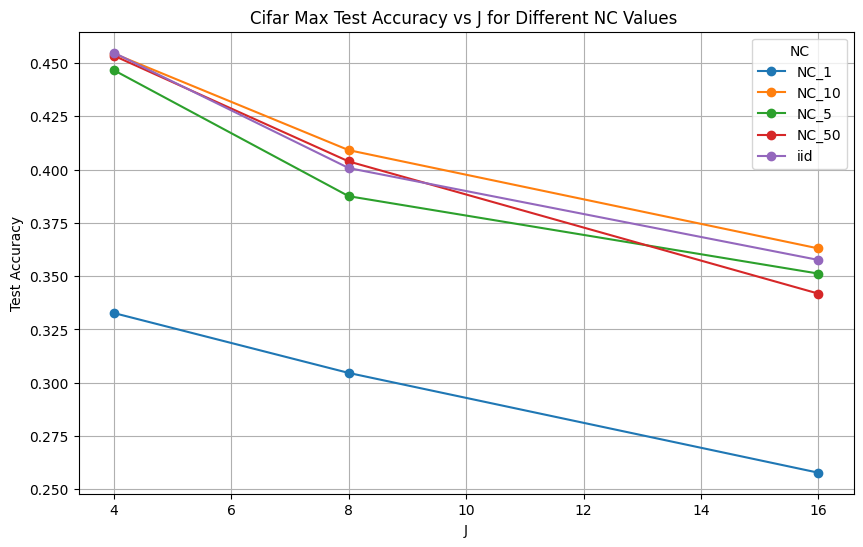

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("global_cifar_results_variable_J_and_nc.csv")

def parse_nc_j(name):
    if "iid" in name:
        nc = "iid"
    elif "sampled_uniform" in name:
        nc = "NC_" + re.search(r"uniform_(\d+)", name).group(1)
    else:
        return None, None  # ignore sampled_gamma and others

    j_match = re.search(r"J_(\d+)", name)
    j_val = int(j_match.group(1)) if j_match else None
    return nc, j_val

df[["NC", "J"]] = df["model_name"].apply(lambda x: pd.Series(parse_nc_j(x)))

df = df.dropna(subset=["NC", "J"])

plt.figure(figsize=(10,6))
for nc, group in df.groupby("NC"):
    group = group.sort_values("J")
    plt.plot(group["J"], group["test_max_acc"], marker="o", label=nc)

plt.title("Cifar Max Test Accuracy vs J for Different NC Values ")
plt.xlabel("J")
plt.ylabel("Test Accuracy")
plt.legend(title="NC")
plt.grid(True)
plt.show()


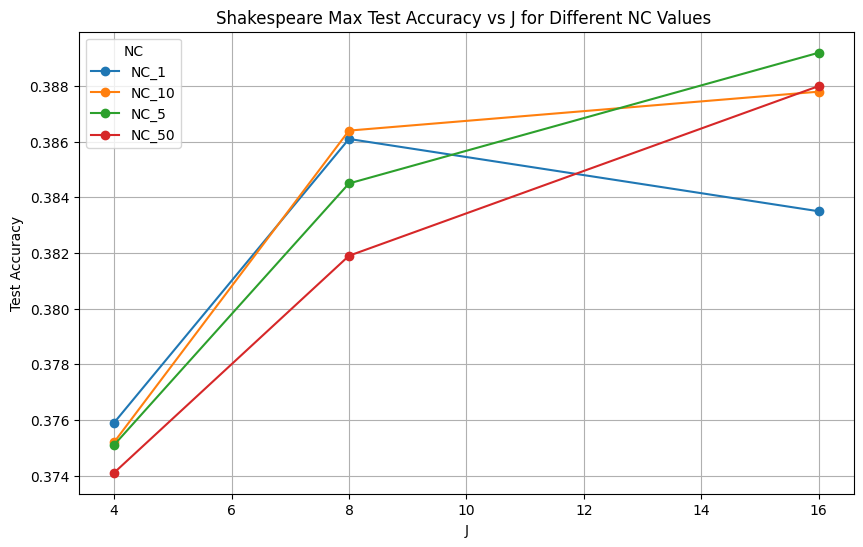

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("shakespeare_global_results.csv")

def parse_nc_j(name):
    if "role" in name:
        nc = "NC_" + re.search(r"nc_(\d+)", name).group(1)
    else:
        return None, None  # ignore sampled_gamma and others

    j_match = re.search(r"J_(\d+)", name)
    j_val = int(j_match.group(1)) if j_match else None
    return nc, j_val

df[["NC", "J"]] = df["model_name"].apply(lambda x: pd.Series(parse_nc_j(x)))

df = df.dropna(subset=["NC", "J"])

plt.figure(figsize=(10,6))
for nc, group in df.groupby("NC"):
    group = group.sort_values("J")
    plt.plot(group["J"], group["test_max_acc"], marker="o", label=nc)

plt.title("Shakespeare Max Test Accuracy vs J for Different NC Values ")
plt.xlabel("J")
plt.ylabel("Test Accuracy")
plt.legend(title="NC")
plt.grid(True)
plt.show()